Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
df = pd.read_csv("spotify.csv")
df.head()

,title,artist,the genre of the track,year,Beats.Per.Minute -The tempo of the song,"Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song","Loudness/dB - The higher the value, the louder the song","Liveness - The higher the value, the more likely the song is a live recording","Valence - The higher the value, the more positive mood for the song",Length - The duration of the song,Acousticness - The higher the value the more acoustic the song is,Speechiness - The higher the value the more spoken word the song contains,Popularity- The higher the value the more popular the song is
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


PreProcessing

In [2]:
# checking for null or empty values
df.isna()

,title,artist,the genre of the track,year,Beats.Per.Minute -The tempo of the song,"Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song","Loudness/dB - The higher the value, the louder the song","Liveness - The higher the value, the more likely the song is a live recording","Valence - The higher the value, the more positive mood for the song",Length - The duration of the song,Acousticness - The higher the value the more acoustic the song is,Speechiness - The higher the value the more spoken word the song contains,Popularity- The higher the value the more popular the song is
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,False,False,False,False,False,False,False,False,False,False,False,False,False,False
599,False,False,False,False,False,False,False,False,False,False,False,False,False,False
600,False,False,False,False,False,False,False,False,False,False,False,False,False,False
601,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
# 
df.dtypes

title                                                                            object
artist                                                                           object
the genre of the track                                                           object
year                                                                              int64
Beats.Per.Minute -The tempo of the song                                           int64
Energy- The energy of a song - the higher the value, the more energtic            int64
Danceability - The higher the value, the easier it is to dance to this song       int64
Loudness/dB - The higher the value, the louder the song                           int64
Liveness - The higher the value, the more likely the song is a live recording     int64
Valence - The higher the value, the more positive mood for the song               int64
Length - The duration of the song                                                 int64
Acousticness - The higher the va

Renaming columns

In [4]:
df.rename(columns = {
    'the genre of the track': 'genre',
    'Beats.Per.Minute -The tempo of the song': 'BPM',
    'Energy- The energy of a song - the higher the value, the more energtic': 'Energy',
    'Danceability - The higher the value, the easier it is to dance to this song': 'Danceability',
    'Loudness/dB - The higher the value, the louder the song': 'Loudness',
    'Liveness - The higher the value, the more likely the song is a live recording': 'Liveness',
    'Valence - The higher the value, the more positive mood for the song': 'Valence',
    'Length - The duration of the song': 'Length',
    'Acousticness - The higher the value the more acoustic the song is': 'Acousticness',
    'Speechiness - The higher the value the more spoken word the song contains': 'Speechiness',
    'Popularity- The higher the value the more popular the song is': 'Popularity'
}, inplace=True)

In [5]:
df.dtypes

title           object
artist          object
genre           object
year             int64
BPM              int64
Energy           int64
Danceability     int64
Loudness         int64
Liveness         int64
Valence          int64
Length           int64
Acousticness     int64
Speechiness      int64
Popularity       int64
dtype: object

From the above datatypes, it is clear that we have 3 categorical features and rest numeric variables. Let's first try to gain insights about the Categorical features of the dataset
### Distribution of 'Genre' 

In [6]:
# Total unique values feature 'genre' holds
df['genre'].nunique()

50

In [7]:
df['genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

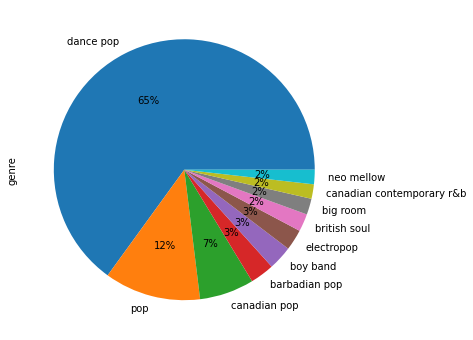

In [8]:
df['genre'].value_counts().head(10).plot.pie(figsize=(10,6), autopct='%1.0f%%')

In [9]:
# Total unique values feature 'artist' holds
df['artist'].nunique()

184

In [10]:
df['artist'].value_counts()

Katy Perry             17
Justin Bieber          16
Rihanna                15
Maroon 5               15
Lady Gaga              14
                       ..
Iggy Azalea             1
5 Seconds of Summer     1
Michael Jackson         1
Disclosure              1
Daddy Yankee            1
Name: artist, Length: 184, dtype: int64

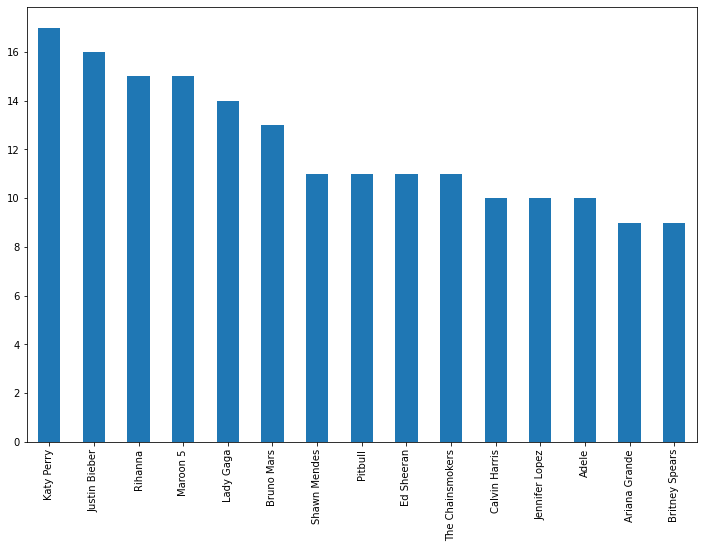

In [11]:
df['artist'].value_counts().head(15).plot.bar(figsize=(12,8))

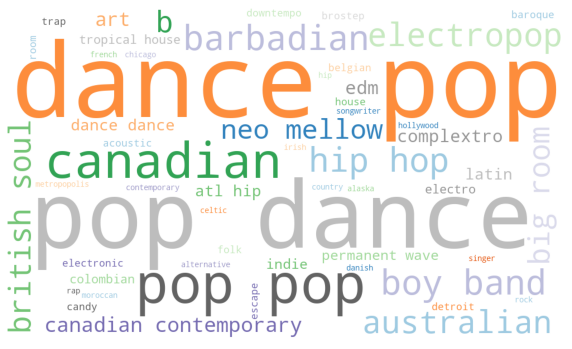

In [12]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 75,
                      background_color='white', colormap='tab20c').generate(" ".join(df['genre']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
# Total unique values feature 'year' holds
df['year'].nunique()

10

In [14]:
df['year'].value_counts()

2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: year, dtype: int64

### Analysis of numeric features

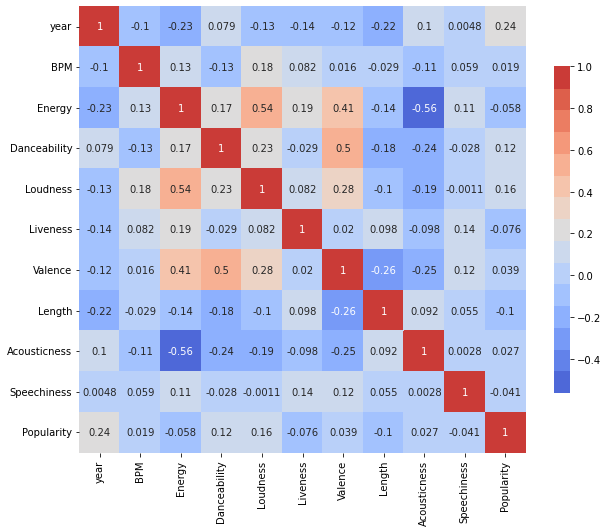

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap=sns.color_palette("coolwarm", 15), annot=True, square=True, cbar=True, cbar_kws=dict(shrink=.6))

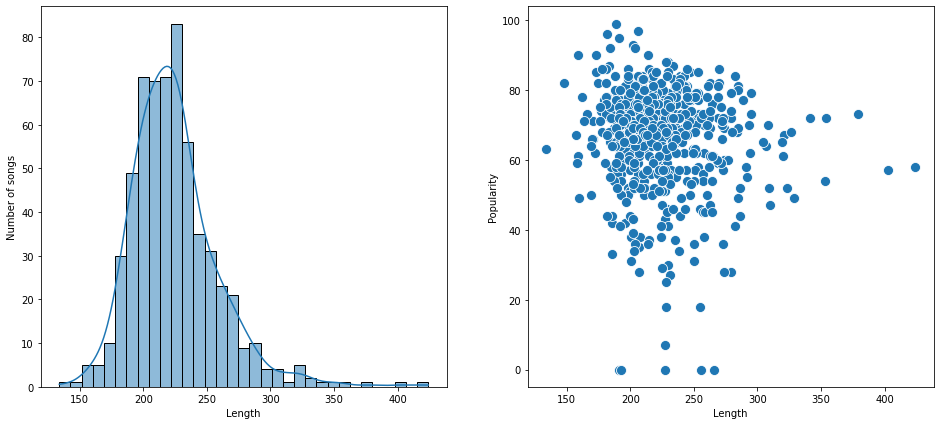

In [16]:
# Distribution of length of songs 
fig, axes = plt.subplots(1, 2, figsize=(16,7))
p = sns.histplot(ax=axes[0], data=df, x='Length', kde=True)
p.set_ylabel("Number of songs")

q = sns.scatterplot(ax=axes[1], data=df, x="Length", y="Popularity", s=100)

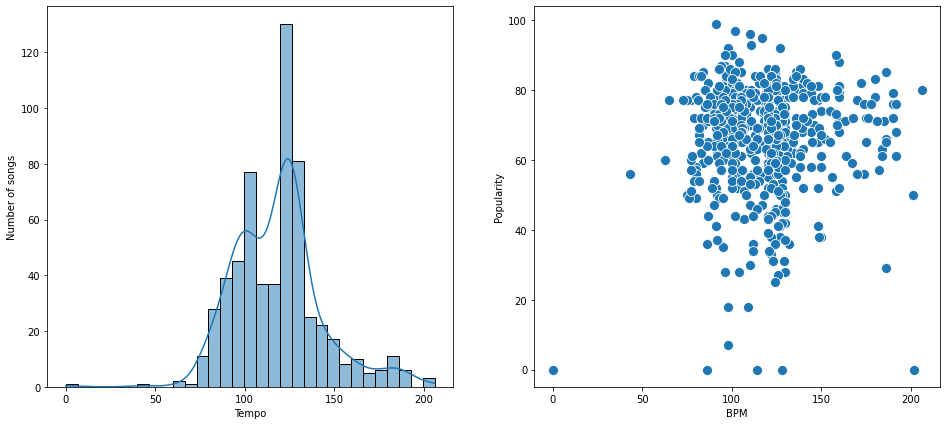

In [17]:
# Distribution of Tempo of songs
fig, axes = plt.subplots(1, 2, figsize=(16,7))
p = sns.histplot(ax=axes[0], data=df, x='BPM', kde=True)
p.set_ylabel("Number of songs")
p.set_xlabel("Tempo")

q = sns.scatterplot(ax=axes[1], data=df, x="BPM", y="Popularity", s=100)

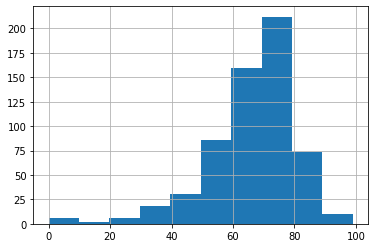

In [18]:
# Distribution of Popularity feature
df['Popularity'].hist()

In [19]:
df['Popularity'].describe()

count    603.000000
mean      66.520730
std       14.517746
min        0.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       99.000000
Name: Popularity, dtype: float64

Regression Model Training

In [20]:
X = df.iloc[:,3:-1]
X.tail()

,year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness
598,2019,104,66,61,-7,20,16,176,1,3
599,2019,95,79,75,-6,7,61,206,21,12
600,2019,136,76,53,-5,9,65,260,7,34
601,2019,114,79,60,-6,42,24,217,1,7
602,2019,150,44,70,-9,13,23,213,6,6


In [21]:
# Encoding categorical feature 'year' using OneHotEncoding 
l_enc= LabelEncoder()
X['year'] = l_enc.fit_transform(X['year'])

o_enc = OneHotEncoder(handle_unknown='ignore')
enc_X = pd.DataFrame(o_enc.fit_transform(X[['year']]).toarray())
X = X.join(enc_X)
X.rename(columns = {
    '0': 'year_2010',
    '1': 'year_2011',
    '2': 'year_2012',
    '3': 'year_2013',
    '4': 'year_2014',
    '5': 'year_2015',
    '6': 'year_2016',
    '7': 'year_2017',
    '8': 'year_2018',
    '9': 'year_2019'
}, inplace=True)
X.drop(columns=['year'])
X

,year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,0,1,2,3,4,5,6,7,8,9
0,0,97,89,67,-4,8,80,217,19,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,87,93,75,-5,52,64,263,24,23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,120,84,76,-3,29,71,200,10,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,119,92,70,-4,8,71,295,0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,109,84,64,-5,9,43,221,2,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,9,104,66,61,-7,20,16,176,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
599,9,95,79,75,-6,7,61,206,21,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
600,9,136,76,53,-5,9,65,260,7,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
601,9,114,79,60,-6,42,24,217,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
Y = df.loc[:, 'Popularity']
Y.head()

0    83
1    82
2    80
3    79
4    78
Name: Popularity, dtype: int64

In [23]:
# Division of dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [24]:
# Normalization 
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X_train)
Norm_X_train = pd.DataFrame(minmax_df)

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X_test)
Norm_X_test = pd.DataFrame(minmax_df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Linear Regression Model:

In [25]:
reg = LinearRegression().fit(Norm_X_train, Y_train)
train_score = reg.score(Norm_X_train, Y_train)
print(f'Train Score: {train_score}')

y_pred = reg.predict(Norm_X_test)
test_score = reg.score(Norm_X_test, Y_test)
print(f'Test Score: {test_score}')

print(f'R2 Score: {r2_score(Y_test, y_pred)}')
  
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Train Score: 0.2038376102078917
Test Score: -2.458657733378738
R2 Score: -2.458657733378738
MAE: 24.801324503311257
MSE: 797.3327814569536
RMSE: 28.23708167387263


Conversion to classification problem:

In [26]:
# Important definitions that we will be using throughtout the experiments
def PreProcess(df: pd.DataFrame) -> pd.DataFrame:
  df.isna()
  df.rename(columns = {
    'the genre of the track': 'genre',
    'Beats.Per.Minute -The tempo of the song': 'BPM',
    'Energy- The energy of a song - the higher the value, the more energtic': 'Energy',
    'Danceability - The higher the value, the easier it is to dance to this song': 'Danceability',
    'Loudness/dB - The higher the value, the louder the song': 'Loudness',
    'Liveness - The higher the value, the more likely the song is a live recording': 'Liveness',
    'Valence - The higher the value, the more positive mood for the song': 'Valence',
    'Length - The duration of the song': 'Length',
    'Acousticness - The higher the value the more acoustic the song is': 'Acousticness',
    'Speechiness - The higher the value the more spoken word the song contains': 'Speechiness',
    'Popularity- The higher the value the more popular the song is': 'Popularity'
  }, inplace=True)
  return df

def SplitDataset(X: pd.DataFrame, Y: pd.DataFrame) -> pd.DataFrame:
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
  return X_train, X_test, Y_train, Y_test

def ConvertYear(X: pd.DataFrame) -> pd.DataFrame:
  l_enc= LabelEncoder()
  X['year'] = l_enc.fit_transform(X['year'])
  o_enc = OneHotEncoder(handle_unknown='ignore')
  enc_X = pd.DataFrame(o_enc.fit_transform(X[['year']]).toarray())
  X = X.join(enc_X)
  X.rename(columns = {
      '0': 'year_2010',
      '1': 'year_2011',
      '2': 'year_2012',
      '3': 'year_2013',
      '4': 'year_2014',
      '5': 'year_2015',
      '6': 'year_2016',
      '7': 'year_2017',
      '8': 'year_2018',
      '9': 'year_2019'
  }, inplace=True)
  X.drop(columns=['year'])
  return X

def Normalize(X_train, X_test):
  scaler = MinMaxScaler()
  minmax_df = scaler.fit_transform(X_train)
  Norm_X_train = pd.DataFrame(minmax_df)

  scaler = MinMaxScaler()
  minmax_df = scaler.fit_transform(X_test)
  Norm_X_test = pd.DataFrame(minmax_df)
  return Norm_X_train, Norm_X_test

def Standardization(X):
  SC = StandardScaler()
  Scaled_X = SC.fit_transform(X)
  return Scaled_X

In [27]:
# Cross Validation definitions
def LOO(X, Y, model):
  LOOCV = LeaveOneOut()
  scoring = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score, average = 'micro'),
       'recall' : make_scorer(recall_score, average = 'micro'), 
       'f1_score' : make_scorer(f1_score, average = 'micro')}
  score = cross_validate(model, X, Y, cv=LOOCV, scoring=scoring)
  print("For LOOCV:")
  print(f'Avg Precision: {sum(score["test_precision"])/len(score["test_precision"])}')
  print(f'Avg Recall: {sum(score["test_recall"])/len(score["test_recall"])}')
  print(f'Avg F1_Score: {sum(score["test_f1_score"])/len(score["test_f1_score"])}')
  print(f'Average Accuracy of LOOCV : {sum(score["test_accuracy"])/len(score["test_accuracy"])}')
  # errors = cross_val_score(model, X, Y, cv=LOOCV, scoring='neg_mean_absolute_error')
  # MSE = np.absolute(errors)
  # print(f'Average Error of LOOCV : {MSE.mean():.3f}')

def StratifiedCV(X, Y, model, splits):
  print(f"For {splits}-Fold:")
  KFCV = KFold(n_splits = splits)
  scoring = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score, average = 'micro'),
       'recall' : make_scorer(recall_score, average = 'micro'), 
       'f1_score' : make_scorer(f1_score, average = 'micro')}
  score = cross_validate(model, X, Y, cv=KFCV, scoring=scoring)
  print(f'Avg Accuracy of {splits}-fold: {sum(score["test_accuracy"])/len(score["test_accuracy"])}')
  print(f'Avg Precision: {sum(score["test_precision"])/len(score["test_precision"])}')
  print(f'Avg Recall: {sum(score["test_recall"])/len(score["test_recall"])}')
  print(f'Avg F1_Score: {sum(score["test_f1_score"])/len(score["test_f1_score"])}')

  # MSE = np.absolute(error)
  # print(f'Errors of {splits} fold cross validation: {MSE}')
  # print(f'Average error of 3-fold : {MSE.mean():.3f}')
  # score = cross_val_score(model, X, Y, cv=KFCV, scoring='accuracy')
  # print(f'Scores of {splits} fold cross validation: {score}')
  # print(f'Average Accuracy of {splits}-fold : {score.mean():.3f}')




Baseline Setup

In [28]:
df = pd.read_csv("spotify.csv")
df = PreProcess(df)
df["Popularity"] = np.where(df["Popularity"] > 75, 1, 0)
df['Popularity'].value_counts()

0    432
1    171
Name: Popularity, dtype: int64

In [29]:
X = df.iloc[:,3:-1]
Y = df.loc[:, 'Popularity']

X = ConvertYear(X)
X_train, X_test, Y_train, Y_test = SplitDataset(X, Y)
Norm_X_train, Norm_X_test = Normalize(X_train, X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Logistic Regression Model (Baseline):

In [30]:
lr_model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)
lr_model.score(X_test, Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7086092715231788

In [31]:
cm = confusion_matrix(Y_test, y_pred)
print(f'Confusion matrix:\n{cm}')
print(f'Classification Report:\n{classification_report(Y_test, y_pred)}')

Confusion matrix:
[[101   6]
 [ 38   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       107
           1       0.50      0.14      0.21        44

    accuracy                           0.71       151
   macro avg       0.61      0.54      0.52       151
weighted avg       0.66      0.71      0.64       151



Decision Tree Classifier:

In [32]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=4, criterion='gini')
decision_tree = dt_model.fit(Norm_X_train, Y_train)
y_pred = dt_model.predict(Norm_X_test)
dt_model.score(Norm_X_test, Y_test)

0.6158940397350994

In [33]:
cm = confusion_matrix(Y_test, y_pred)
print(f'Confusion matrix:\n{cm}')
print(f'Classification Report:\n{classification_report(Y_test, y_pred)}')

Confusion matrix:
[[77 30]
 [28 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       107
           1       0.35      0.36      0.36        44

    accuracy                           0.62       151
   macro avg       0.54      0.54      0.54       151
weighted avg       0.62      0.62      0.62       151



Hyperparameter Tuning for Decision Tree

In [34]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
Norm_X = pd.DataFrame(minmax_df)
LOO(Norm_X, Y, dt_model)
StratifiedCV(Norm_X, Y, dt_model, 10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


For LOOCV:
Avg Precision: 0.6832504145936982
Avg Recall: 0.6832504145936982
Avg F1_Score: 0.6832504145936982
Average Accuracy of LOOCV : 0.6832504145936982
For 10-Fold:
Avg Accuracy of 10-fold: 0.5454098360655737
Avg Precision: 0.5454098360655737
Avg Recall: 0.5454098360655737
Avg F1_Score: 0.5454098360655737


In [35]:
params = {
  'criterion':['gini','entropy'],
  'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}
clf = GridSearchCV(dt_model, param_grid=params, cv=5)
clf.fit(Norm_X, Y)
print(f'Best Parameters: {clf.best_params_}')
print(f'Best Score: {clf.best_score_}')

Best Parameters: {'criterion': 'gini', 'max_depth': 4}
Best Score: 0.35801652892561986


Random Forest Classifier:

In [36]:
rf_model = RandomForestClassifier(n_jobs=-1, max_features= 'auto', n_estimators=20, oob_score=True)
rf_model.fit(Norm_X_train, Y_train)
y_pred = rf_model.predict(Norm_X_test)
print(rf_model.score(Norm_X_test, Y_test))
print(rf_model.oob_score_)


0.6887417218543046
0.7256637168141593


In [37]:
cm = confusion_matrix(Y_test, y_pred)
print(f'Confusion matrix:\n{cm}')
print(f'Classification Report:\n{classification_report(Y_test, y_pred)}')

Confusion matrix:
[[98  9]
 [38  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       107
           1       0.40      0.14      0.20        44

    accuracy                           0.69       151
   macro avg       0.56      0.53      0.50       151
weighted avg       0.63      0.69      0.63       151



Hyperparameter tuning for Random Forest Classifier

In [38]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
Norm_X = pd.DataFrame(minmax_df)
LOO(Norm_X, Y, dt_model)
StratifiedCV(Norm_X, Y, rf_model, 10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


For LOOCV:
Avg Precision: 0.6832504145936982
Avg Recall: 0.6832504145936982
Avg F1_Score: 0.6832504145936982
Average Accuracy of LOOCV : 0.6832504145936982
For 10-Fold:


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Avg Accuracy of 10-fold: 0.5768306010928962
Avg Precision: 0.5768306010928962
Avg Recall: 0.5768306010928962
Avg F1_Score: 0.5768306010928962


In [39]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df)
param_grid = { 
    'n_estimators': [20, 50, 100, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
rfc = RandomForestClassifier(n_jobs=-1, max_features= 'sqrt' ,n_estimators=50) 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='recall')
CV_rfc.fit(X, Y)
CV_rfc.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


{'max_features': 'auto', 'n_estimators': 50}

In [40]:
m_best = CV_rfc.best_estimator_
print(m_best)

RandomForestClassifier(n_estimators=50, n_jobs=-1)


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = m_best.predict(Norm_X_test)
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))


0.8571428571428571
0.2727272727272727
0.41379310344827586


SVM Classifier:

In [42]:
C = [0.1, 0.2, 0.3, 1, 5, 10, 20, 100, 200, 1000]
degree = [1, 2, 3, 4, 5]
coef0 = [0.0001, 0.001, 0.002, 0.01, 0.02, 0.1, 0.2, 0.3, 1, 2, 5, 10]
gamma = [0.0001, 0.001, 0.002, 0.01, 0.02, 0.03, 0.1, 0.2, 1, 2, 3]

In [43]:
param_grid = {'C': C, 
              'gamma': gamma,
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(Norm_X_train, Y_train)
print(f'Best Paramaters: {grid.best_params_}')
y_pred = grid.predict(Norm_X_test)
print(f'Classification Report: \n{classification_report(Y_test, y_pred)}')

Fitting 5 folds for each of 110 candidates, totalling 550 fits
Best Paramaters: {'C': 0.2, 'gamma': 1, 'kernel': 'rbf'}
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       107
           1       0.75      0.07      0.12        44

    accuracy                           0.72       151
   macro avg       0.74      0.53      0.48       151
weighted avg       0.73      0.72      0.63       151



Feature Reduction Approach using KNN

In [44]:
df = pd.read_csv('spotify.csv')
df = PreProcess(df)
df["Popularity"] = pd.cut(x=df['Popularity'], bins = [-1, 50, 75, 99], labels =[0, 1, 2])
print(f'Popularity Count: {df["Popularity"].value_counts()}')
X = df.iloc[:,3:-1]
Y = df.loc[:, 'Popularity']
X = ConvertYear(X)
X_train, X_test, Y_train, Y_test = SplitDataset(X, Y)
Norm_X_train, Norm_X_test = Normalize(X_train, X_test)

Popularity Count: 1    362
2    171
0     70
Name: Popularity, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
def KNN(df):  
  X = df.iloc[:, 4:]
  print(X.shape)
  Y = df.loc[:, 'Popularity']
  print(Y.shape)
  # Split into training and test set
  X_train, X_test, y_train, y_test = train_test_split(
              X, Y, test_size = 0.2, random_state=42)
    
  neighbors = np.arange(1, 5)
  train_accuracy = np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))
    
  # Loop over K values
  for i, k in enumerate(neighbors):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      print(f'Train: {knn.score(X_train, y_train)}')
      print(f'Test: {knn.score(X_test, y_test)}')

        
      # Compute training and test data accuracy
      train_accuracy[i] = knn.score(X_train, y_train)
      test_accuracy[i] = knn.score(X_test, y_test)
      print(knn.kneighbors(X, return_distance=False))
    
  # Generate plot
  plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
  plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
    
  plt.legend()
  plt.xlabel('n_neighbors')
  plt.ylabel('Accuracy')
  plt.show()

For year: 2010
1    39
2     9
0     3
Name: Popularity, dtype: int64
                                        title         artist            genre  \
0                            Hey, Soul Sister          Train       neo mellow   
1                        Love The Way You Lie         Eminem  detroit hip hop   
2                                     TiK ToK          Kesha        dance pop   
3                                 Bad Romance      Lady Gaga        dance pop   
4                        Just the Way You Are     Bruno Mars              pop   
5                                        Baby  Justin Bieber     canadian pop   
6                                    Dynamite      Taio Cruz        dance pop   
7                                     Secrets    OneRepublic        dance pop   
8  Empire State of Mind (Part II) Broken Down    Alicia Keys          hip pop   

   year  BPM  Energy  Danceability  Loudness  Liveness  Valence  Length  \
0  2010   97      89            67        -4

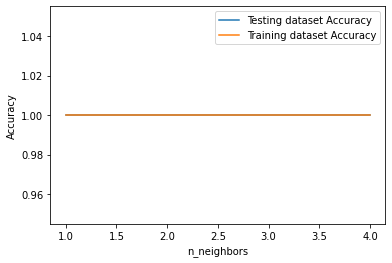

In [46]:
year_wise_df = {}
for i in range(2010, 2019):
  df_year = df[df['year'] == i]
  year_wise_df[i] = df_year

for key,val in year_wise_df.items():
  print(f'For year: {key}')
  print(f'{val["Popularity"].value_counts()}')
  new_df = val[val['Popularity'] == 2]
  print(new_df)
  KNN(new_df)
  break

In [47]:
df_2010 = year_wise_df[2010]
new_df = df_2010[df_2010['Popularity'] == 2]
temp_df = new_df.iloc[[1,3,4,6], :]
temp_df

,title,artist,genre,year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,2
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,2
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,2
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,2


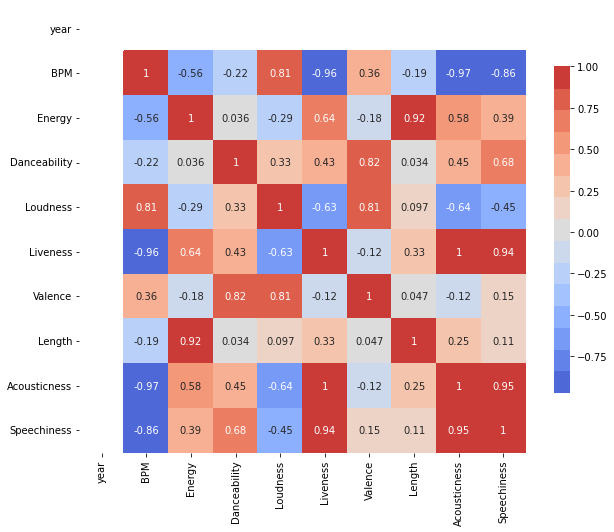

In [48]:
plt.subplots(figsize=(10,10))
sns.heatmap(temp_df.corr(), cmap=sns.color_palette("coolwarm", 15), annot=True, square=True, cbar=True, cbar_kws=dict(shrink=.6))

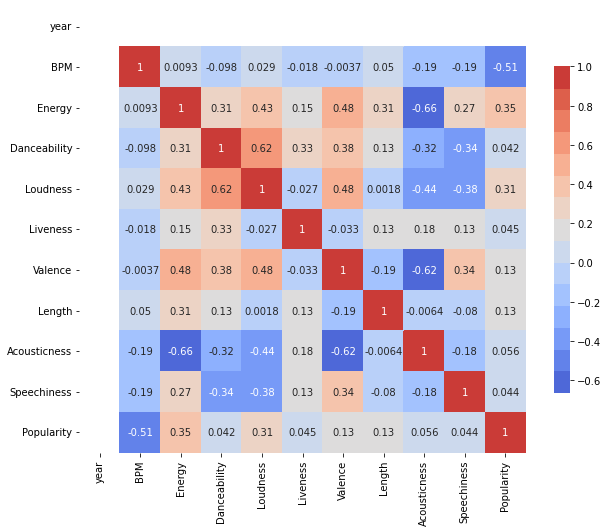

In [49]:
df = pd.read_csv('spotify.csv')
df = PreProcess(df)
df_2010 = df[df['year'] == 2010]
df_2010_pop = df_2010[df_2010['Popularity'] > 70]
plt.subplots(figsize=(10,10))
sns.heatmap(df_2010_pop.corr(), cmap=sns.color_palette("coolwarm", 15), annot=True, square=True, cbar=True, cbar_kws=dict(shrink=.6))

Use of condensed dataset for classification

In [50]:
df_2010["Popularity"] = np.where(df_2010["Popularity"] > 70, 1, 0)
X = df_2010.loc[:, ['BPM', 'Energy', 'Loudness']]
Y = df_2010.loc[:, 'Popularity']
print(f'{df_2010.shape}')
print(f'{Y.shape}')

(51, 14)
(51,)


<ipython-input-50-3951d783df5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010["Popularity"] = np.where(df_2010["Popularity"] > 70, 1, 0)


In [51]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df)

param_grid = { 
    'n_estimators': [20, 50, 100, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, Y)
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 20}

In [52]:
# Random Forest Classifier trained with best parameters from hyperparameters tuning

df = pd.read_csv('spotify.csv')
df = PreProcess(df)

df["Popularity"] = np.where(df["Popularity"] > 70, 1, 0)

X = df.loc[:, ['BPM', 'Energy', 'Loudness']]
Y = df.loc[:, 'Popularity']

X_train, X_test, Y_train, Y_test = SplitDataset(X, Y)
Norm_X_train, Norm_X_test = Normalize(X_train, X_test)

rf_model = RandomForestClassifier(n_jobs=-1, max_features= 'log2', n_estimators=20)
rf_model.fit(Norm_X_train, Y_train)
y_pred = rf_model.predict(Norm_X_test)
rf_model.score(Norm_X_test, Y_test)

0.4900662251655629

PCA Analysis for 3 bin division (Additional testing)

In [53]:
df = pd.read_csv('spotify.csv')
df = PreProcess(df)

df["Popularity"] = pd.cut(x=df['Popularity'], bins = [-1, 50, 75, 99], labels =[0, 1, 2])
print(f'Popularity Count: {df["Popularity"].value_counts()}')

X = df.iloc[:,3:-1]
Y = df.loc[:, 'Popularity']
X = ConvertYear(X)

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df)

# X_train, X_test, Y_train, Y_test = SplitDataset(X, Y)
# Norm_X_train, Norm_X_test = Normalize(X_train, X_test)

Popularity Count: 1    362
2    171
0     70
Name: Popularity, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA.shape

(603, 4)

In [55]:
X = pd.DataFrame(minmax_df)
param_grid = { 
    'n_estimators': [20, 50, 100, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, Y)
CV_rfc.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


{'max_features': 'log2', 'n_estimators': 20}

In [56]:
X_train, X_test, Y_train, Y_test = SplitDataset(X_PCA, Y)
rf_model = RandomForestClassifier(n_jobs=-1, max_features= 'auto', n_estimators=20)
rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)
print(rf_model.score(X_test, Y_test))
print(accuracy_score(Y_test, y_pred))

0.5099337748344371
0.5099337748344371


In [57]:
cm = confusion_matrix(Y_test, y_pred)
print(f'Confusion matrix:\n{cm}')
print(f'Classification Report:\n{classification_report(Y_test, y_pred)}')

Confusion matrix:
[[ 3 15  2]
 [ 3 66 18]
 [ 0 36  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.15      0.23        20
           1       0.56      0.76      0.65        87
           2       0.29      0.18      0.22        44

    accuracy                           0.51       151
   macro avg       0.45      0.36      0.37       151
weighted avg       0.47      0.51      0.47       151

